In [30]:
from bs4 import BeautifulSoup
import requests

In [31]:
url = 'https://pokemondb.net/pokedex/all'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [32]:
# Checks website html
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [33]:
f'''
    Finds table with the class name "data-table sticky-header block-wide".
    To check all the tables in a page, use this: {soup.find_all('table')}
'''

table = soup.find('table', class_ = "data-table sticky-header block-wide")

In [34]:
'''
    Finds all th (headers) from the table.
'''

titles = table.find_all('th')

In [35]:
'''
    Create list for title headers with list comprehensions.
    .text: removes <th> </th>
    .strip(): removes \n
'''

table_title_list = [title.text.strip() for title in titles]
print(table_title_list)

['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']


In [36]:
import pandas as pd

In [37]:
# store headers in Data Frame
df = pd.DataFrame(columns= table_title_list)

# Print out DataFrane content
df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed


In [38]:
'''
    Finds all row in the table.
'''

column_data = table.find_all('tr')
print(type(column_data))

<class 'bs4.element.ResultSet'>


In [39]:
'''
    Loops through a row and get data.
'''

for row in column_data[1:]: # starts at index 1 to exclude header row
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)    # stores how many rows in the df
    df.loc[length] = individual_row_data    # appends individual row data to df every time df updates length

In [40]:
# show the update DataFrame

df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,0004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [41]:
'''
    Had to have a separate file path because Windows is protecting my folder for my GitHub Repo,
    thus, executable files cannot create changes.
'''
filepath = r'C:\Users\SERVIN\Desktop\Important local files\Data Analyst\data'

df.to_csv(f'{filepath}\poke_index_data.csv', index = False)

In [42]:
import sqlite3
import os
import plotly.express as px

In [43]:
df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,0004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
1211,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
1212,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
1213,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [44]:
'''
    I already have instance of the df so I am commenting out this file line of code for now.
'''
# df = pd.read_csv('datasets\poke_index_data.csv')  # load csv file

'\n    I already have instance of the df so I am commenting out this file line of code for now.\n'

In [45]:
# Creating SQLite database
db_filepath = r'C:\Users\SERVIN\Desktop\Important local files\Data Analyst\data'

conn = sqlite3.connect(f'{db_filepath}\database.db')
cursor = conn.cursor()

In [46]:
create_table = '''CREATE TABLE IF NOT EXISTS pokemonData(
'#' INTEGER NOT NULL,
Name VARCHAR(40) NOT NULL,
Type VARCHAR(40) NOT NULL,
Total INTEGER NOT NULL,
HP INTEGER NOT NULL,
Attack INTEGER NOT NULL,
Defense INTEGER NOT NULL,
'Sp. Atk' INTEGER NOT NULL,
'Sp. Def' INTEGER NOT NULL,
Speed INTEGER NOT NULL);
'''
cursor.execute(create_table)    # exectue sql command   
conn.commit()   # commit sql command

In [47]:
# # Drop the table if it exists
# cursor.execute("DROP TABLE IF EXISTS pokemonData")

# # Commit the changes (optional for DROP TABLE)
# conn.commit()

In [48]:
'''
    Loading df to SQLite table.
'''
df.to_sql('pokemonData', conn, if_exists='append', index = False)



1215

In [49]:
# Verify the data types in the table
cursor.execute("PRAGMA table_info(pokemonData)")
table_info = cursor.fetchall()
for column in table_info:
    print(column)

(0, '#', 'INTEGER', 1, None, 0)
(1, 'Name', 'VARCHAR(40)', 1, None, 0)
(2, 'Type', 'VARCHAR(40)', 1, None, 0)
(3, 'Total', 'INTEGER', 1, None, 0)
(4, 'HP', 'INTEGER', 1, None, 0)
(5, 'Attack', 'INTEGER', 1, None, 0)
(6, 'Defense', 'INTEGER', 1, None, 0)
(7, 'Sp. Atk', 'INTEGER', 1, None, 0)
(8, 'Sp. Def', 'INTEGER', 1, None, 0)
(9, 'Speed', 'INTEGER', 1, None, 0)


In [50]:
'''
    Read sql with pd.
'''
pd.read_sql('''SELECT * FROM pokemonData''', conn)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
3640,1023,Iron Crown,Steel Psychic,590,90,72,100,122,108,98
3641,1024,Terapagos Normal Form,Normal,450,90,65,85,65,85,60
3642,1024,Terapagos Terastal Form,Normal,600,95,95,110,105,110,85
3643,1024,Terapagos Stellar Form,Normal,700,160,105,110,130,110,85


In [51]:
# conn.close()

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
pokemon_df = pd.read_csv(f'{filepath}\poke_index_data.csv')  # load csv file
print(pokemon_df)

         #                     Name           Type  Total   HP  Attack  \
0        1                Bulbasaur   Grass Poison    318   45      49   
1        2                  Ivysaur   Grass Poison    405   60      62   
2        3                 Venusaur   Grass Poison    525   80      82   
3        3   Venusaur Mega Venusaur   Grass Poison    625   80     100   
4        4               Charmander           Fire    309   39      52   
...    ...                      ...            ...    ...  ...     ...   
1210  1023               Iron Crown  Steel Psychic    590   90      72   
1211  1024    Terapagos Normal Form         Normal    450   90      65   
1212  1024  Terapagos Terastal Form         Normal    600   95      95   
1213  1024   Terapagos Stellar Form         Normal    700  160     105   
1214  1025                Pecharunt   Poison Ghost    600   88      88   

      Defense  Sp. Atk  Sp. Def  Speed  
0          49       65       65     45  
1          63       80       

## Top 10 Highest Overall Total

In [54]:
top_total = []
for col_name, row in pokemon_df.iterrows():
    ele = []
    ele.append(row['Name'])
    ele.append(row['Total'])
    top_total.append(ele)
    
print(top_total)

[['Bulbasaur', 318], ['Ivysaur', 405], ['Venusaur', 525], ['Venusaur Mega Venusaur', 625], ['Charmander', 309], ['Charmeleon', 405], ['Charizard', 534], ['Charizard Mega Charizard X', 634], ['Charizard Mega Charizard Y', 634], ['Squirtle', 314], ['Wartortle', 405], ['Blastoise', 530], ['Blastoise Mega Blastoise', 630], ['Caterpie', 195], ['Metapod', 205], ['Butterfree', 395], ['Weedle', 195], ['Kakuna', 205], ['Beedrill', 395], ['Beedrill Mega Beedrill', 495], ['Pidgey', 251], ['Pidgeotto', 349], ['Pidgeot', 479], ['Pidgeot Mega Pidgeot', 579], ['Rattata', 253], ['Rattata Alolan Rattata', 253], ['Raticate', 413], ['Raticate Alolan Raticate', 413], ['Spearow', 262], ['Fearow', 442], ['Ekans', 288], ['Arbok', 448], ['Pikachu', 320], ['Pikachu Partner Pikachu', 430], ['Raichu', 485], ['Raichu Alolan Raichu', 485], ['Sandshrew', 300], ['Sandshrew Alolan Sandshrew', 300], ['Sandslash', 450], ['Sandslash Alolan Sandslash', 450], ['Nidoran♀', 275], ['Nidorina', 365], ['Nidoqueen', 505], ['Nid

In [55]:
sorted_by_total = pokemon_df.sort_values(by = 'Total', ascending = False)
top_10 = sorted_by_total.head(10)
top_10_name_total = top_10[['Name','Total']]
print(top_10_name_total)


                         Name  Total
1058      Eternatus Eternamax   1125
475    Rayquaza Mega Rayquaza    780
201      Mewtwo Mega Mewtwo X    780
202      Mewtwo Mega Mewtwo Y    780
473    Groudon Primal Groudon    770
471      Kyogre Primal Kyogre    770
961   Necrozma Ultra Necrozma    754
605                    Arceus    720
865    Zygarde Complete Forme    708
776       Kyurem White Kyurem    700


In [56]:
'''
    Read sql with pd.
'''
pd.read_sql('''SELECT Name, Total
            FROM pokemonData
            ORDER BY Total DESC
            LIMIT(10)''', conn)

,Name,Total
0,Eternatus Eternamax,1125
1,Eternatus Eternamax,1125
2,Eternatus Eternamax,1125
3,Mewtwo Mega Mewtwo X,780
4,Mewtwo Mega Mewtwo Y,780
5,Rayquaza Mega Rayquaza,780
6,Mewtwo Mega Mewtwo X,780
7,Mewtwo Mega Mewtwo Y,780
8,Rayquaza Mega Rayquaza,780
9,Mewtwo Mega Mewtwo X,780


In [67]:
# Handle types (split primary and secondary types)
pokemon_df['Type 1'] = pokemon_df['Type'].apply(lambda x: x.split()[0])
pokemon_df['Type 2'] = pokemon_df['Type'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else None)

In [69]:
# Get the top 10 Pokémon types
top_10_types = pokemon_df['Type 1'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 types
top_10_df = pokemon_df[pokemon_df['Type 1'].isin(top_10_types)]

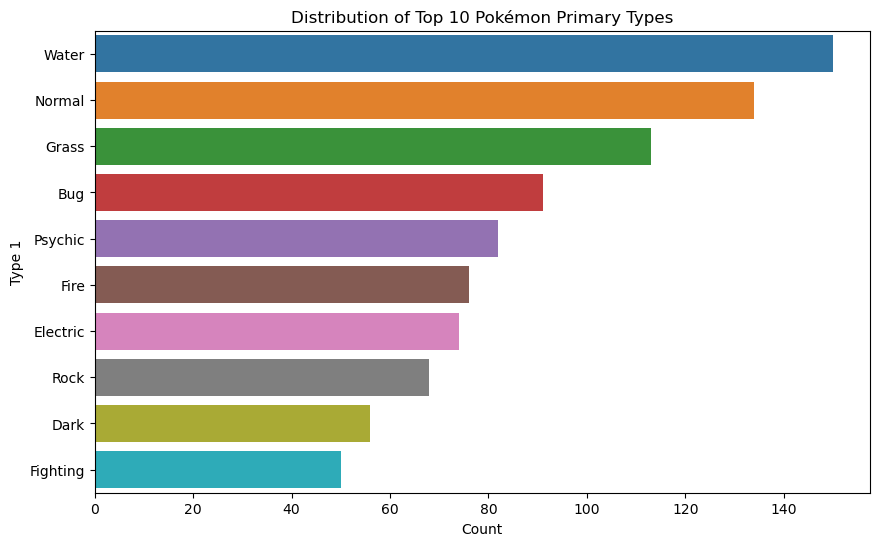

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Type 1', data=top_10_df, order=top_10_df['Type 1'].value_counts().index)
plt.title('Distribution of Top 10 Pokémon Primary Types')
plt.xlabel('Count')
plt.ylabel('Type 1')
plt.show()

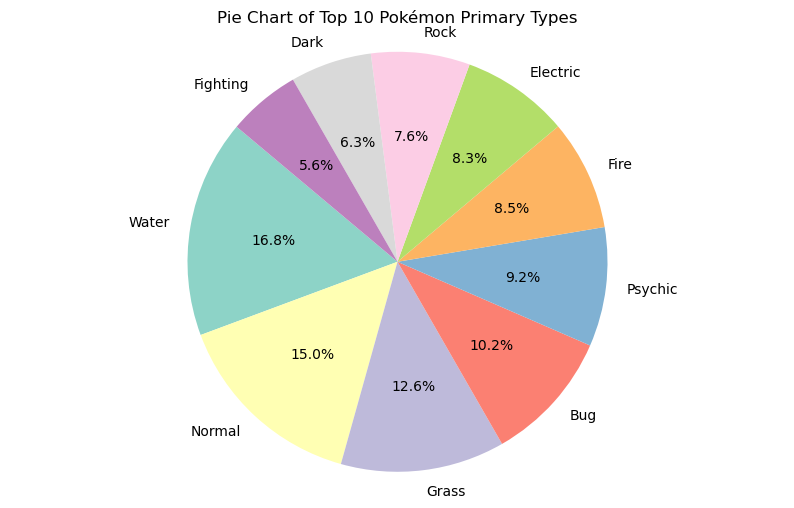

In [72]:
# Distribution of Pokémon Types (Pie Chart for Top 10 Types)
plt.figure(figsize=(10, 6))
type_counts_top_10 = top_10_df['Type 1'].value_counts()
plt.pie(type_counts_top_10, labels=type_counts_top_10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(type_counts_top_10)))
plt.title('Pie Chart of Top 10 Pokémon Primary Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

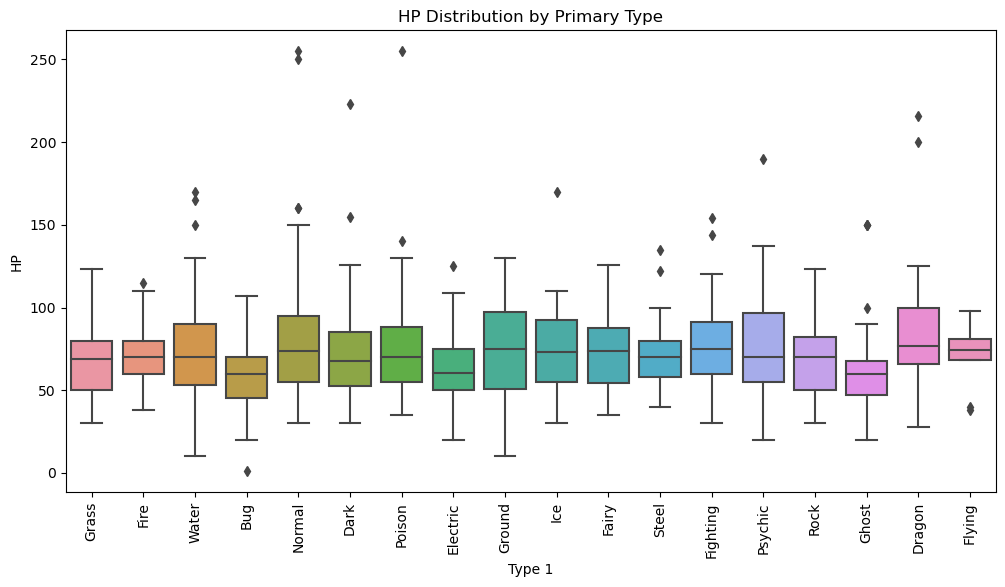

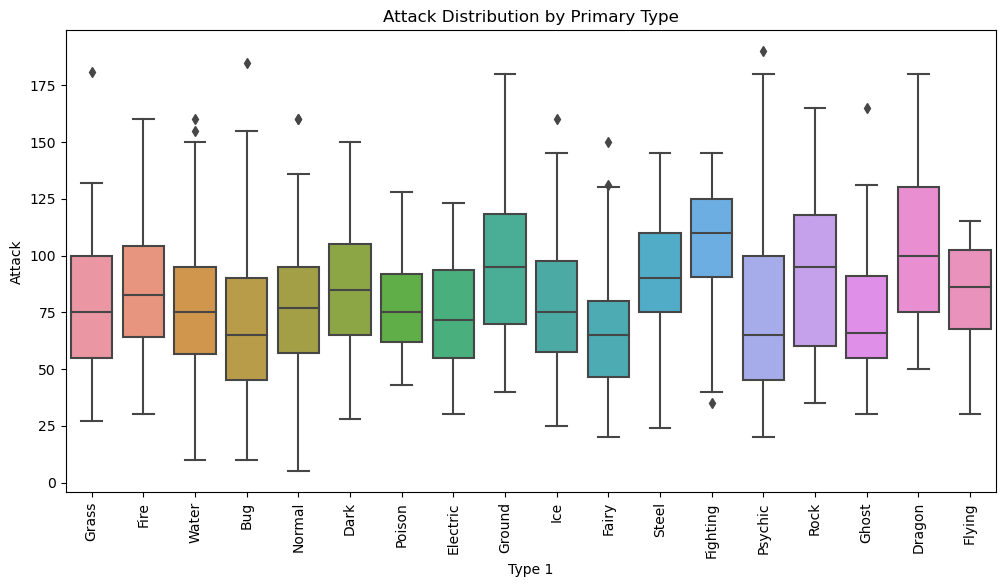

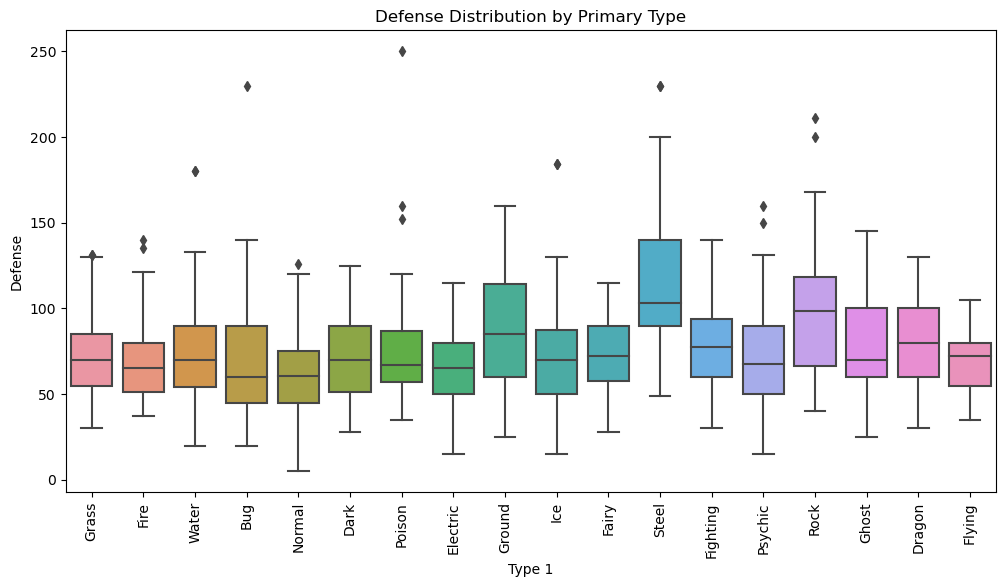

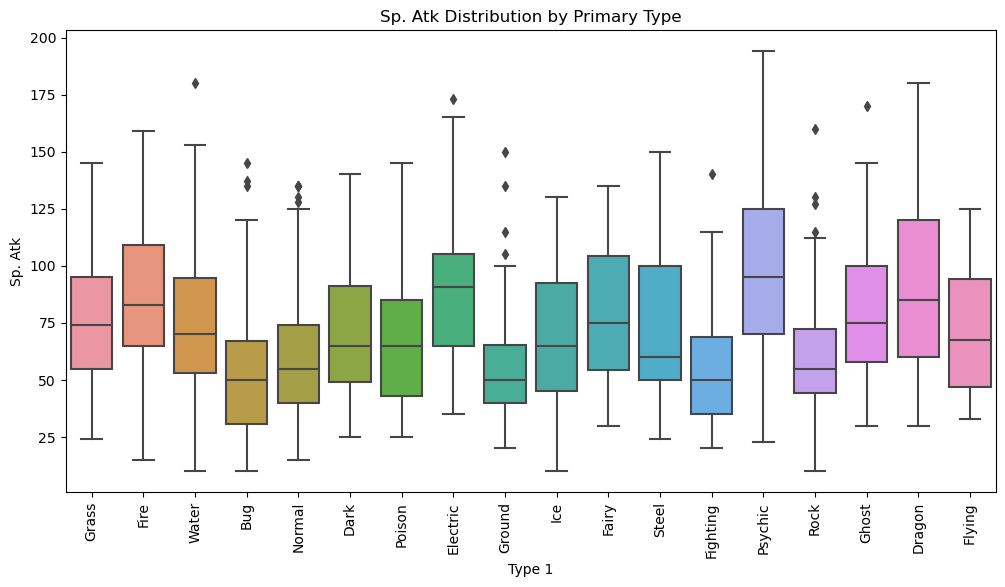

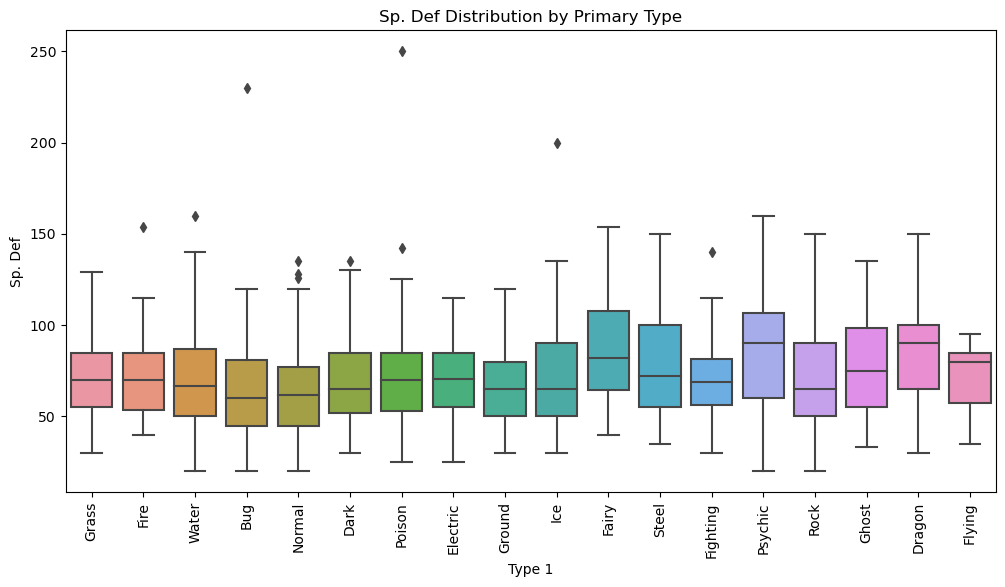

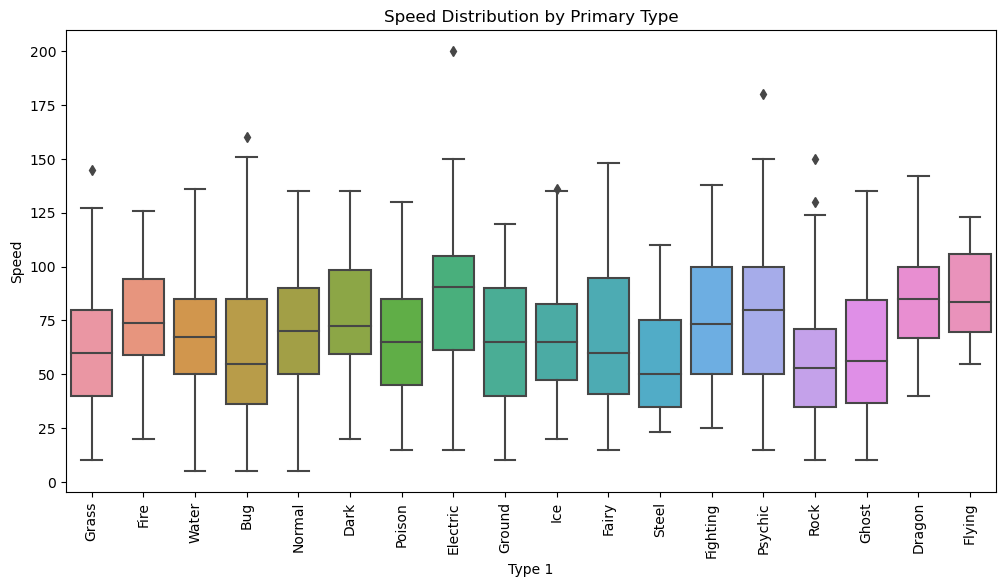

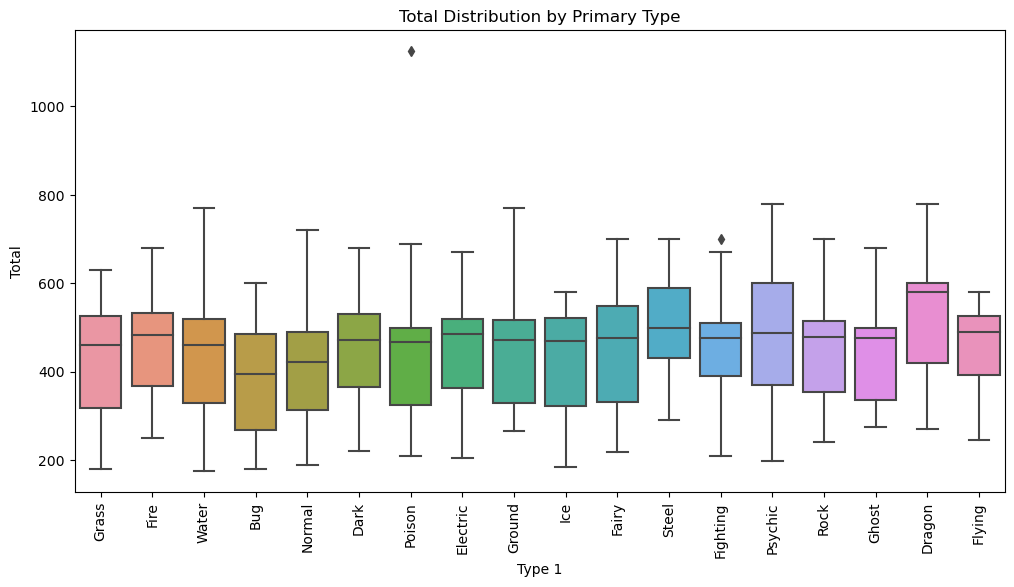

In [73]:
# Stat Distributions (Boxplots)
stats_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
for stat in stats_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Type 1', y=stat, data=pokemon_df)
    plt.title(f'{stat} Distribution by Primary Type')
    plt.xlabel('Type 1')
    plt.ylabel(stat)
    plt.xticks(rotation=90)
    plt.show()

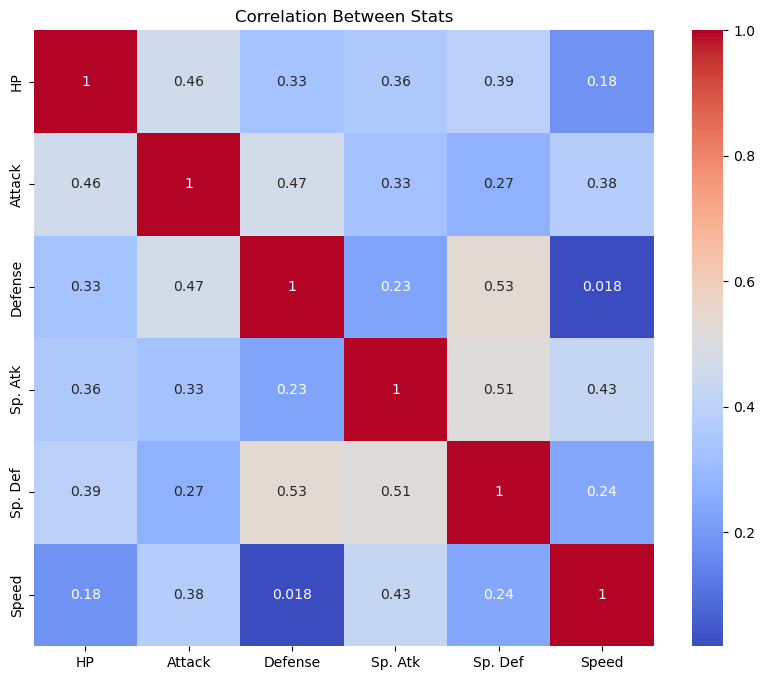

In [75]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
stats = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
corr = stats.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stats')
plt.show()

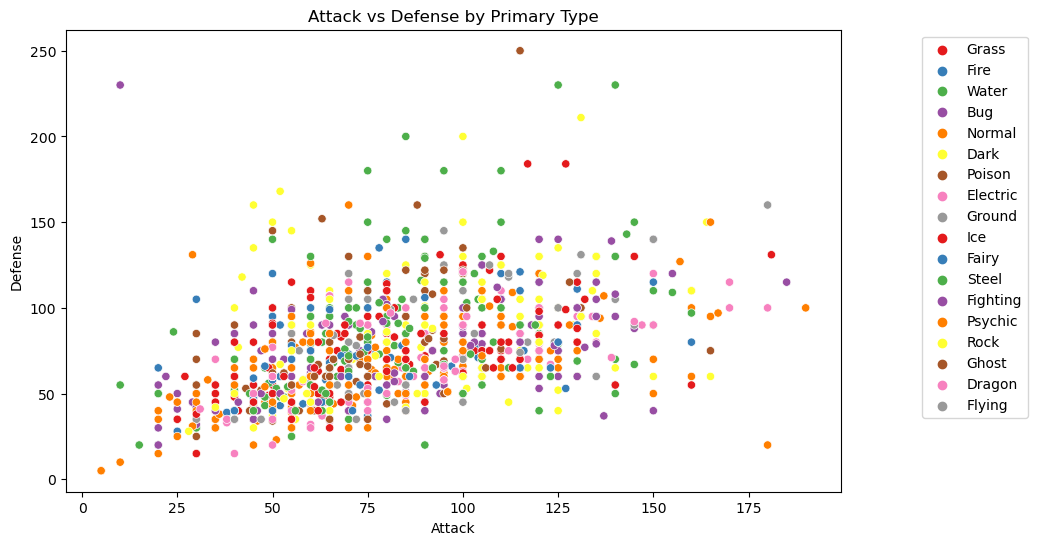

In [76]:
# Scatter Plot (Attack vs Defense)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Type 1', data=pokemon_df, palette='Set1')
plt.title('Attack vs Defense by Primary Type')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## Top 10 Fastest

## Top 10 Attack:Defense Ratio